## Обробка та аналіз БМД
  
**Лабораторна робота №7**  
**t-критерій Стьюдента для незалежних вибірок**  
виконала студентка групи БС-81  
Соловйова Анастасія

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randint
from math import sqrt

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані.

In [2]:
group1 = randint(80, 150, 31)
group2 = randint(80, 150, 31)

df = pd.DataFrame({
    "Глядацький зал 1": group1, 
    "Глядацький зал 2": group2,})

df.index.name = 'Число місяця'
df.columns.name = 'Кількість глядачів'
N = df.shape[0]
df

Кількість глядачів,Глядацький зал 1,Глядацький зал 2
Число місяця,,
0,130,80
1,140,101
2,123,123
3,131,98
4,139,143
5,135,112
6,80,139
7,149,110
8,137,136


2.Побудувати графік, що відображає розкид даних в групах.

[]

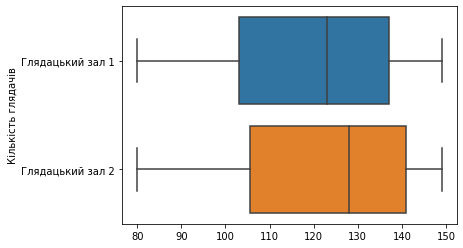

In [3]:
sns.boxplot(data = df, orient = 'h').set()

3.Написати функції:  
- для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).

- для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def Sigma(arr):
    summa = 0
    mean = sum(arr)/N
    for i in range(N):
        summa += (arr[i] - mean)**2
    return summa/(N - 1)

def Liven(df):
    s1 = Sigma(df["Глядацький зал 1"])
    s2 = Sigma(df["Глядацький зал 2"])
    
    if(s1>s2):
        F = s1/s2
    else:
        F = s2/s1
    print('Отримане значення критерію Лівеня : F = ' + str(F))
    
    data = data1 = data2 = N - 1
    if data1 > 15:
        data1 = '>15'
        
    if data2 > 20:
        data2 = '>20'
    print('Значення ступенів свободи: df = ' + str(data))
    
    table = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx",index_col=0)
    table = table[data1][data2]
    print("Критичне значення критерію Лівеня = " + str(table))
    
    if F < table:
        result = "significant"
        print("Результат оцінки значимості зв'зку: " + result)
    else:
        result = "not significant"
        print("Результат оцінки значимості зв'зку: " + result)
        
    return F, result


In [5]:
def Student(df, value):
    s1 = Sigma(df["Глядацький зал 1"])
    s2 = Sigma(df["Глядацький зал 2"])
    df2 = 2*N - 2
   
    if value == 'significant':
        t = (abs((sum(df["Глядацький зал 1"])/N) - (sum(df["Глядацький зал 2"])/N)))/sqrt((s1 / N) + (s2 / N))
    else:
        t = (abs((sum(df["Глядацький зал 1"])/N) - (sum(df["Глядацький зал 2"])/N))) / sqrt(((N - 1)*s1 + (N - 1)*s2)*((1/N)+(1/N)) / df2)
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df2))
    
    table = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx").iloc[df2, 1]
    print("Критичне значення критерію Стьюдента = " + str(table))
    
    if t < table:
        result = "significant" 
        print("Результат оцінки значимості зв'зку: " + result)
    else:
        result = "not significant"
        print("Результат оцінки значимості зв'зку: " + result)
    
    return t, df2, result

4.Перевірити розбіжність на між групами на даних з п. 1.

In [6]:
Liven(df)

Отримане значення критерію Лівеня : F = 1.0691703946784092
Значення ступенів свободи: df = 30
Критичне значення критерію Лівеня = 1.45
Результат оцінки значимості зв'зку: significant


(1.0691703946784092, 'significant')

In [7]:
Student(df, 'significant')

Отримане значення критерію Стьюдента: t = 0.7916982771782055
Значення ступеня свободи: df = 60
Критичне значення критерію Стьюдента = 2.0
Результат оцінки значимості зв'зку: significant


(0.7916982771782055, 60, 'significant')